# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/0fa7eace50843f3d0b40763a3c498ad342b34604a66dfdef4d012a7e.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Charlotte, North Carolina, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'0fa7eace50843f3d0b40763a3c498ad342b34604a66dfdef4d012a7e')

# Process the Data
 1. read in CSV file into DataFrame, convert `"Date"` column to `Timestamp` and use as index
 2. convert `"Data_Value"` to degrees C by dividing by 10
 3. create a `"day"` column for the year day ordinal value (1 to 365)
 4. normalize leapyears to disregard Feb 29th
 5. partition data into a 2015 set and a 2005-2014 set
 6. set the `"day"` column as the index
 7. for both sets produce two series, one for the record high and another for the record low with the day as the index
 8. drop values from the 2015 set that don't break the 10 year record of the same day

In [2]:
data_path = 'data/C2A2_data/BinnedCsvs_d400/0fa7eace50843f3d0b40763a3c498ad342b34604a66dfdef4d012a7e.csv'
df = pd.read_csv(data_path, converters={'Date': pd.Timestamp}, index_col='Date')
df['Data_Value'] /= 10.0
df.head()

,ID,Element,Data_Value
Date,,,
2015-04-26,USW00013881,TMIN,8.9
2011-07-27,USC00386293,TMAX,34.4
2005-06-29,USC00389350,TMAX,30.0
2006-09-28,USW00013881,TMAX,27.2
2006-11-24,USW00013881,TMAX,20.6


In [3]:
df['day'] = df.index.dayofyear

In [4]:
# Remove Feb 29th points
df.drop(['2008-02-29', '2012-02-29'], inplace=True)

In [5]:
# Subtract 1 from all leapyear days after day 60 (Feb 29th)
df.loc[df.index.is_leap_year & (df['day'] > 60), 'day'] -= 1

In [6]:
df_15 = df[df.index.year == 2015]
df_05_14 = df[df.index.year < 2015]

In [7]:
df_15 = df_15.set_index('day')
df_05_14 = df_05_14.set_index('day')

In [8]:
s_15_hi = df_15['Data_Value'].groupby(level=0).max()
s_15_hi.head()

day
1    12.2
2    12.8
3    11.7
4    18.9
5    17.8
Name: Data_Value, dtype: float64

In [9]:
s_15_lo = df_15['Data_Value'].groupby(level=0).min()
s_15_lo.head()

day
1   -5.0
2   -5.0
3    3.9
4    6.1
5   -1.6
Name: Data_Value, dtype: float64

In [10]:
s_05_14_hi = df_05_14['Data_Value'].groupby(level=0).max()
s_05_14_hi.head()

day
1    22.8
2    22.8
3    21.1
4    25.0
5    25.0
Name: Data_Value, dtype: float64

In [11]:
s_05_14_lo = df_05_14['Data_Value'].groupby(level=0).min()
s_05_14_lo.head()

day
1    -8.9
2   -11.7
3   -11.7
4   -12.2
5   -12.8
Name: Data_Value, dtype: float64

In [12]:
s_15_lo_br = s_15_lo[s_15_lo < s_05_14_lo]
s_15_lo_br

day
9     -14.4
38    -11.7
46     -9.9
47     -9.4
50    -14.4
51    -16.7
52    -16.7
57     -8.3
67     -6.7
88     -7.2
89     -7.2
95     -2.2
123     3.3
215    15.6
256     8.9
257     6.1
258     6.1
259     7.2
260     8.9
290    -0.6
294    -1.7
Name: Data_Value, dtype: float64

In [13]:
s_15_hi_br = s_15_hi[s_15_hi > s_05_14_hi]
s_15_hi_br

day
22     18.9
64     23.3
76     29.4
131    34.4
138    32.2
139    32.8
140    34.4
166    37.8
167    37.8
169    37.8
191    39.4
194    39.4
295    29.4
316    26.7
349    24.4
350    25.6
358    22.8
359    23.3
360    24.4
361    25.6
362    23.9
363    24.4
364    23.9
Name: Data_Value, dtype: float64

# Plot the Data
The chart should show the following:
 1. plot an area-line between the 10 year record data, temperature (degrees C) on the y axis and day-of-year on the x axis
 2. scatter plot with appropriate color/symbol for the 2015 record breaking data
 3. add a chart title
 4. add axis title
 5. label x-axis with month-day according to 2015 calendar
 6. add a chart legend
 7. **dejunkify!**

<IPython.core.display.Javascript object>


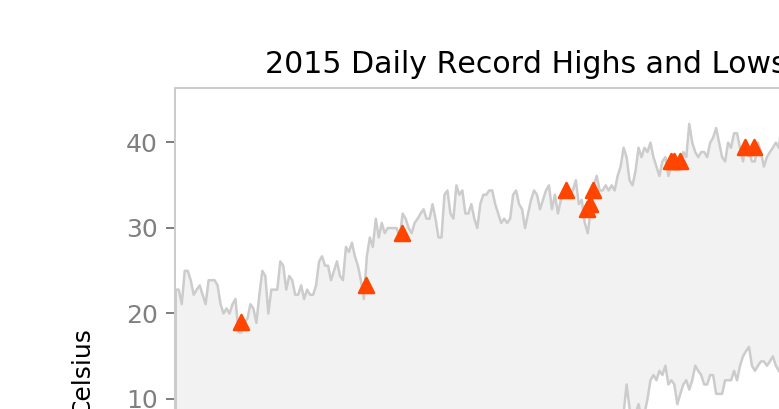

1

In [192]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

plt.rc_context({
    'axes.edgecolor': '#cccccc',
    'xtick.color': '#808080',
    'ytick.color': '#808080'
})

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylabel('Celsius')
ax2.set_ylabel('Fahrenheit')

C_to_F = lambda C: C * 1.8 + 32.

def update_ax2(ax1):
    y1, y2 = ax1.get_ylim()
    ax2.set_ylim(C_to_F(y1), C_to_F(y2))
    ax2.figure.canvas.draw()

ax.callbacks.connect('ylim_changed', update_ax2)

In [193]:
ax.fill_between(np.arange(365), s_05_14_lo, s_05_14_hi,
                facecolor='0.95', edgecolor='0.8', label='Daily Records (2005-2014)')

ax.scatter(s_15_hi_br.index, s_15_hi_br, color='orangered', marker='^', label='2015 Record High')

ax.scatter(s_15_lo_br.index, s_15_lo_br, color='steelblue', marker='v', label='2015 Record Low')

plt.title('2015 Daily Record Highs and Lows in the Charlotte, NC Area')

ax.set_xlim(0, 364)

ax.legend(loc='lower center', framealpha=0)

In [194]:
import calendar

locs = [pd.Timestamp(2015, m, 15).dayofyear for m in range(1, 13)]
labs = [calendar.month_name[m][:3] for m in range(1, 13)]
plt.xticks(locs, labs)

([<matplotlib.axis.XTick at 0x12f092358>,
 <a list of 12 Text xticklabel objects>)

In [196]:
plt.savefig('Assignment2_Figure.png')